In [6]:
import pandas as pd

df = pd.read_csv("../Data/car_prices.csv")
df.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
#cek data
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [8]:
#data cleaning
df = df[['make', 'mmr', 'sellingprice', 'saledate']]
df = df.dropna()
df = df[df['mmr'] > 0]
df = df[df['sellingprice'] > 0]
df = df[df['sellingprice'] <= df['mmr']]



In [9]:
#feature engineering
df['discount'] = df['mmr'] - df['sellingprice']
df['discount_pct'] = df['discount'] / df['mmr']


In [ ]:
#core analysis
#brand dengan diskon persentase tertinggi
df.groupby('make')['discount_pct'].mean().sort_values(ascending=False).head(10)


make
Daewoo        0.537838
Geo           0.440354
oldsmobile    0.433731
dot           0.411765
Oldsmobile    0.384055
Isuzu         0.356025
gmc           0.353238
pontiac       0.339739
gmc truck     0.307915
chrysler      0.299749
Name: discount_pct, dtype: float64

In [ ]:
#brand dengan harga jual tertinggi
df.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(10)


make
Rolls-Royce     149880.000000
Ferrari         123090.909091
Lamborghini     111500.000000
Bentley          74037.500000
Tesla            63673.076923
Aston Martin     50218.181818
Maserati         45893.827160
Fisker           44875.000000
Porsche          41053.194444
Land Rover       32712.355507
Name: sellingprice, dtype: float64

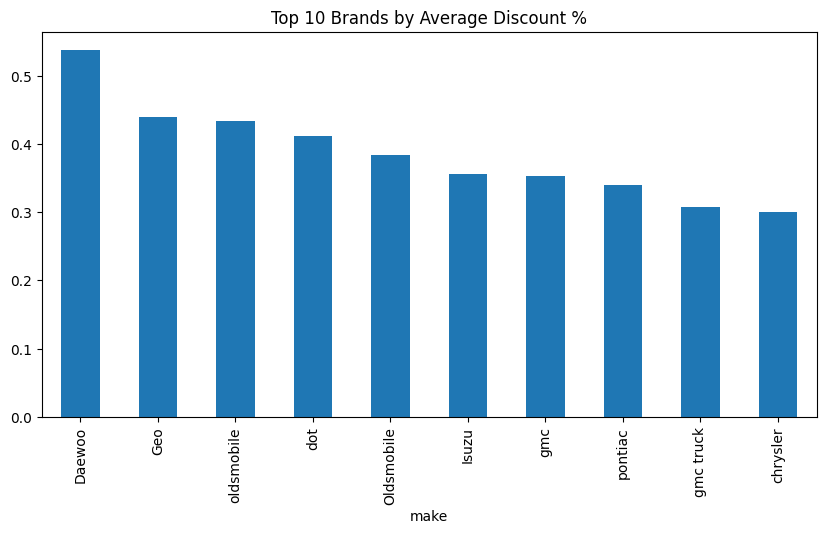

In [15]:
#visualization
import matplotlib.pyplot as plt

df.groupby('make')['discount_pct'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', figsize=(10,5)
)
plt.title("Top 10 Brands by Average Discount %")
plt.show()


### Key Insights
- Brand premium cenderung memberikan diskon lebih kecil
- Diskon besar tidak selalu menurunkan harga jual secara signifikan
- Strategi promosi berbeda antar brand


In [17]:
#clustering
#Tujuan:
#Mengelompokkan brand berdasarkan strategi harga & diskon
brand_df = df.groupby('make').agg({
    'mmr': 'mean',
    'sellingprice': 'mean',
    'discount_pct': 'mean'
})

brand_df.head()



,mmr,sellingprice,discount_pct
make,,,
Acura,14235.692412,13144.649541,0.122566
Aston Martin,52472.727273,50218.181818,0.042917
Audi,20035.460460,18549.958292,0.126466
BMW,22093.561888,20594.682280,0.102706
Bentley,80305.000000,74037.500000,0.077055


In [18]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(brand_df)


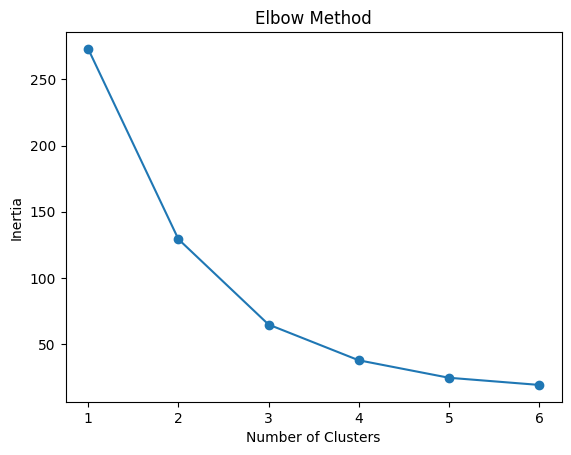

In [19]:
#Tentukan Jumlah Cluster (ELBOW)
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1,7), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [20]:
#train model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
brand_df['cluster'] = kmeans.fit_predict(X_scaled)

brand_df.head()


,mmr,sellingprice,discount_pct,cluster
make,,,,
Acura,14235.692412,13144.649541,0.122566,2
Aston Martin,52472.727273,50218.181818,0.042917,2
Audi,20035.460460,18549.958292,0.126466,2
BMW,22093.561888,20594.682280,0.102706,2
Bentley,80305.000000,74037.500000,0.077055,1


In [ ]:
#INTERPRETASI CLUSTER
brand_df.groupby('cluster').mean()


,mmr,sellingprice,discount_pct
cluster,,,
0,3782.630696,3022.337312,0.289967
1,119886.098485,114627.102273,0.045624
2,18401.039764,16936.864746,0.122656


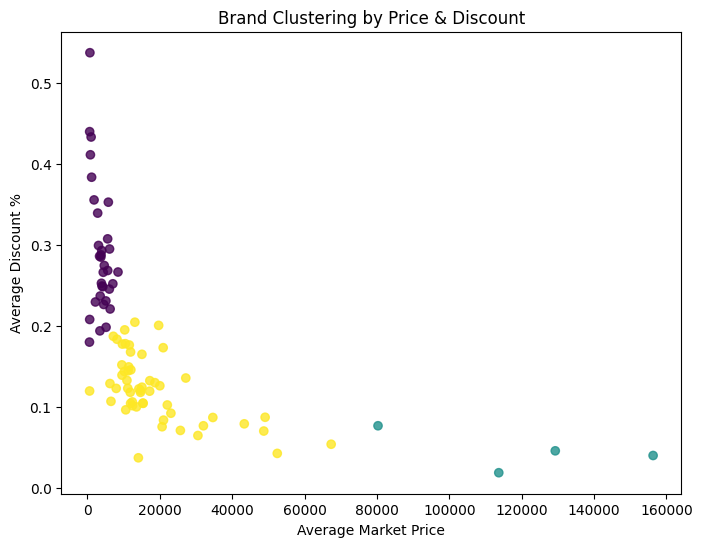

In [22]:
#visualization Cluster
plt.figure(figsize=(8,6))
plt.scatter(
    brand_df['mmr'],
    brand_df['discount_pct'],
    c=brand_df['cluster'],
    alpha=0.8
)
plt.xlabel("Average Market Price")
plt.ylabel("Average Discount %")
plt.title("Brand Clustering by Price & Discount")
plt.show()


Lanjut ke Scatter Plot

In [ ]:
df[['sellingprice', 'discount_pct']].head()
#cek data

,sellingprice,discount_pct
2,30000.0,0.059561
5,10900.0,0.289902
6,65000.0,0.057971
7,9800.0,0.176471
9,17500.0,0.334601


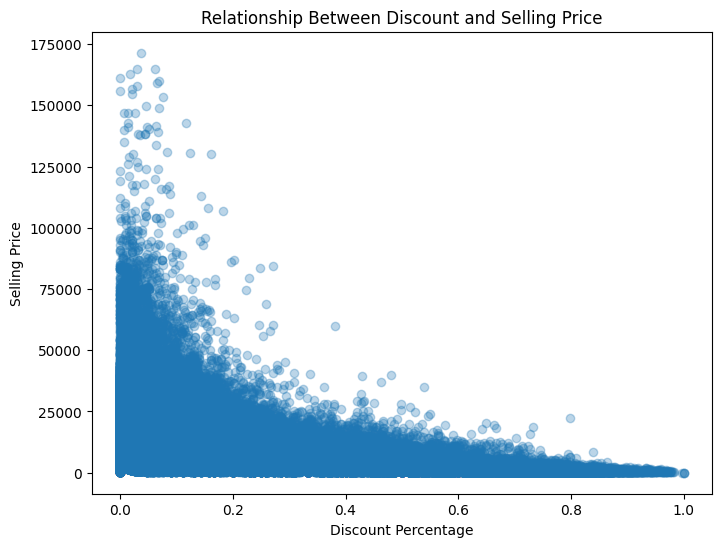

In [ ]:
#scatter dasar
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df['discount_pct'],
    df['sellingprice'],
    alpha=0.3
)

plt.xlabel("Discount Percentage")
plt.ylabel("Selling Price")
plt.title("Relationship Between Discount and Selling Price")
plt.show()
#Ini nunjukin:
#apakah diskon tinggi → harga jual turun
#atau hubungan lemah


In [25]:
#SCATTER + CLUSTER
#Mapping cluster ke data asli
df = df.merge(
    brand_df[['cluster']],
    left_on='make',
    right_index=True,
    how='left'
)


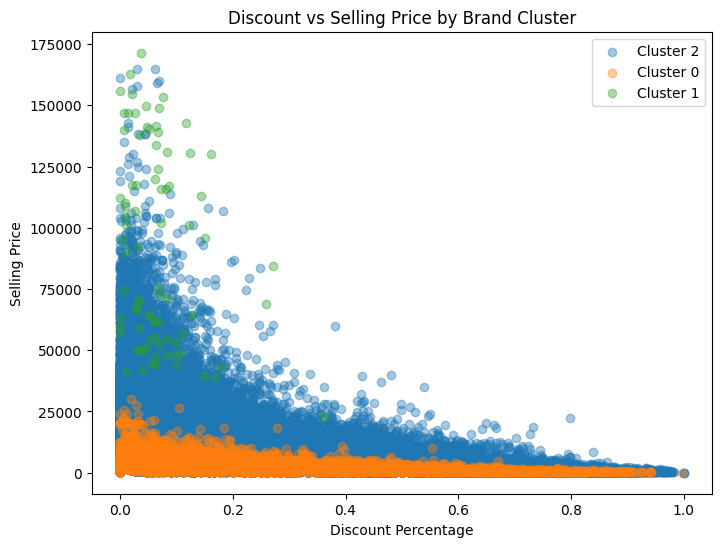

In [26]:
#Scatter berdasarkan cluster
plt.figure(figsize=(8,6))

for c in df['cluster'].unique():
    subset = df[df['cluster'] == c]
    plt.scatter(
        subset['discount_pct'],
        subset['sellingprice'],
        alpha=0.4,
        label=f'Cluster {c}'
    )

plt.xlabel("Discount Percentage")
plt.ylabel("Selling Price")
plt.title("Discount vs Selling Price by Brand Cluster")
plt.legend()
plt.show()


### Scatter Plot Insight
- Hubungan antara diskon dan harga jual cenderung lemah
- Brand premium tetap mempertahankan harga tinggi meskipun diskon
- Diskon agresif lebih sering ditemukan pada cluster non-premium


In [32]:
#Pastikan saledate Format DateTime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
df = df.dropna(subset=['saledate'])


In [29]:
df['saledate'] = pd.to_datetime(
    df['saledate'],
    utc=True,
    errors='coerce'
)


In [30]:
df['saledate'] = pd.to_datetime(
    df['saledate'],
    utc=True,
    errors='coerce'
).dt.tz_localize(None)


In [31]:
df['saledate'].dtype


dtype('<M8[ns]')

In [34]:
# pastikan saledate sudah datetime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

# set index untuk time series
df_ts = df.set_index('saledate')

# agregasi bulanan
monthly_price = df_ts['sellingprice'].resample('M').mean()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24360\589437694.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df_ts['sellingprice'].resample('M').mean()


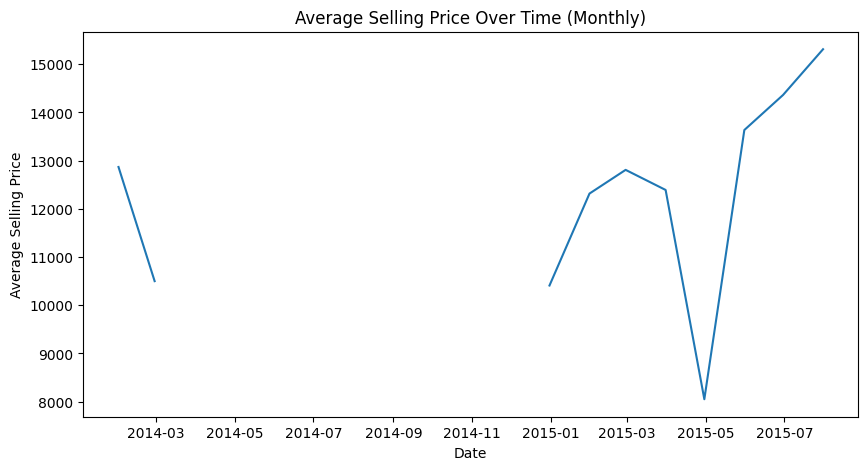

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_price)
plt.title("Average Selling Price Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Average Selling Price")
plt.show()


In [ ]:
monthly_price.head()
#Buat Moving Average (3 bulan & 6 bulan)

saledate
2014-01-31    12868.539326
2014-02-28    10500.000000
2014-03-31             NaN
2014-04-30             NaN
2014-05-31             NaN
Freq: ME, Name: sellingprice, dtype: float64

In [37]:
ma_3 = monthly_price.rolling(window=3).mean()
ma_6 = monthly_price.rolling(window=6).mean()


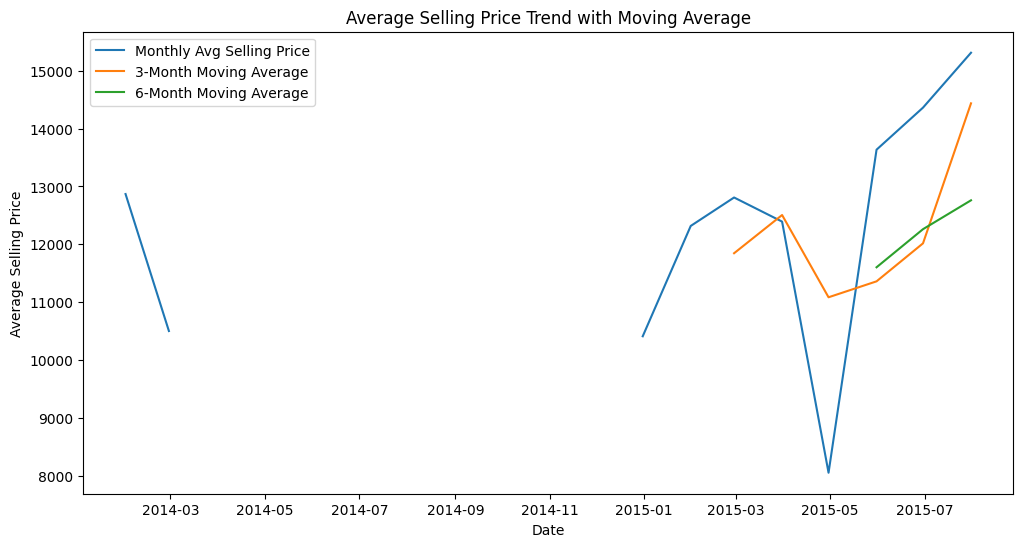

In [38]:
#Plot Harga + Moving Average
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_price, label='Monthly Avg Selling Price')
plt.plot(ma_3, label='3-Month Moving Average')
plt.plot(ma_6, label='6-Month Moving Average')

plt.title("Average Selling Price Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Average Selling Price")
plt.legend()
plt.show()


In [39]:
monthly_price.tail()


saledate
2015-03-31    12391.778029
2015-04-30     8049.941343
2015-05-31    13635.485653
2015-06-30    14362.631448
2015-07-31    15311.942989
Freq: ME, Name: sellingprice, dtype: float64

In [40]:
window = 6
last_ma = monthly_price.rolling(window=window).mean().iloc[-1]


In [41]:
import pandas as pd

future_dates = pd.date_range(
    start=monthly_price.index[-1],
    periods=7,
    freq='M'
)[1:]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24360\1133330276.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


In [42]:
forecast = pd.Series(
    [last_ma] * len(future_dates),
    index=future_dates
)


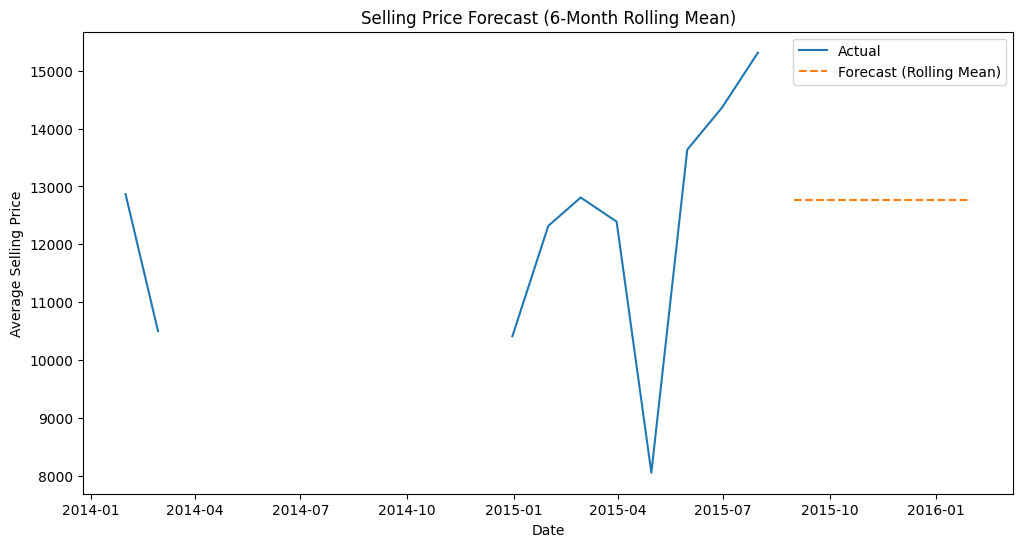

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_price, label='Actual')
plt.plot(forecast, label='Forecast (Rolling Mean)', linestyle='--')

plt.title("Selling Price Forecast (6-Month Rolling Mean)")
plt.xlabel("Date")
plt.ylabel("Average Selling Price")
plt.legend()
plt.show()
